In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import pad_sequences

C:\Users\Meenakshi\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#create dataset
def create_dataset(length=50):
    data=[]
    labels=[]
    if length==50:
        data = np.random.randint(2,size=(100000,length))
        labels = [0 if sum(i)%2 == 0 else 1 for i in data]
    else:
        for i in range(100000):
            length = np.random.randint(1,51)
            data.append(np.random.randint(2,size=(length)))
            labels.append(0 if sum(data[i])%2 == 0 else 1)
        data = np.asarray(data)
        data = pad_sequences(data,maxlen=50,dtype='int', padding='pre')
    
    labels = np.asarray(labels,dtype='int')
    size = int(data.shape[0]*0.20)    
    X_train = data[size:]
    y_train = labels[size:]
    X_test = data[:size]
    y_test = labels[:size]
    
    X_train = np.expand_dims(X_train,axis=2)
    X_test = np.expand_dims(X_test, axis=2)
    
    return X_train,y_train,X_test,y_test

In [3]:
def build_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(50,1)))
    model.add(Dense(1, activation='sigmoid'))
    
    model.summary()
    model.compile('adam', loss='binary_crossentropy',metrics=['acc'])
    return model
    

In [19]:
def plot_model(history):
    loss = history.history['loss']
    validation_loss = history.history['val_loss']
    epochs = range(1,len(loss)+1)
    
    plt.figure()
    plt.plot(epochs,loss,'g',label = 'Training Loss')
    plt.plot(epochs,validation_loss,'b',label = 'Validation Loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    accuracy = history.history['acc']
    validation_accuracy = history.history['val_acc']
    
    plt.figure()    
    plt.plot(epochs,accuracy,'g',label = 'Training accuracy')
    plt.plot(epochs,validation_accuracy,'b',label = 'Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    
    plt.show()
    return
    

In [20]:
class CharRNN:
    
    def __init__(self,binary_string_length=50,batch_size=64, num_steps=50):
    
        X_train, y_train, X_test, y_test = create_dataset(binary_string_length)
        model = build_model()
        history = model.fit(X_train,y_train, epochs = 20, batch_size=64,validation_split =0.2, shuffle=False)
        
        predictions = model.predict(X_test)
        #predictions = np.round(predictions[:,0])
        accuracy = (np.sum(predictions==y_test)/len(y_test))*100.
        
        print('Accuracy: {:.2f}%'.format(accuracy))
        
        plot_model(history)
        return

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
Train on 64000 samples, validate on 16000 samples
Epoch 1/20
64000/64000 [==============================] - 25s 388us/step - loss: 0.6933 - acc: 0.5027 - val_loss: 0.6932 - val_acc: 0.4965
Epoch 2/20
64000/64000 [==============================] - 27s 421us/step - loss: 0.6932 - acc: 0.5033 - val_loss: 0.6933 - val_acc: 0.4949
Epoch 3/20
64000/64000 [==============================] - 26s 412us/step - loss: 0.6932 - acc: 0.5019 - val_loss: 0.6933 - val_acc: 0.4926
Epoch 4/20
64000/64000 [==============================] - 29s 446us

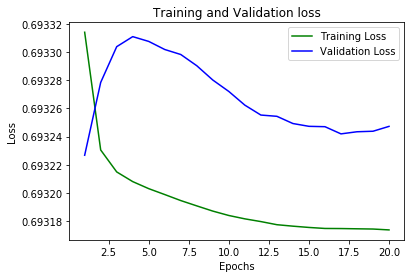

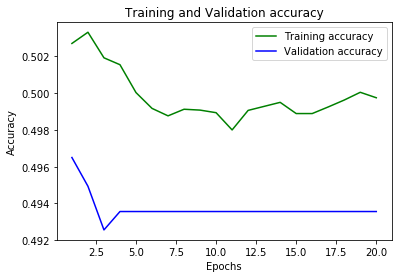

In [21]:
CharRNN(50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
Train on 64000 samples, validate on 16000 samples
Epoch 1/20
64000/64000 [==============================] - 26s 408us/step - loss: 0.6932 - acc: 0.5020 - val_loss: 0.6928 - val_acc: 0.5102
Epoch 2/20
64000/64000 [==============================] - 26s 412us/step - loss: 0.6917 - acc: 0.5108 - val_loss: 0.6874 - val_acc: 0.5114
Epoch 3/20
64000/64000 [==============================] - 28s 433us/step - loss: 0.4763 - acc: 0.6823 - val_loss: 0.0996 - val_acc: 0.9452
Epoch 4/20
64000/64000 [==============================] - 27s 422us

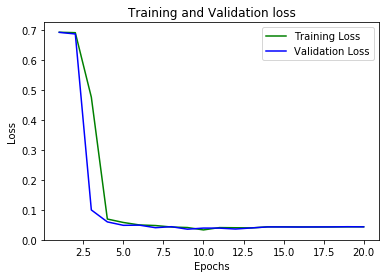

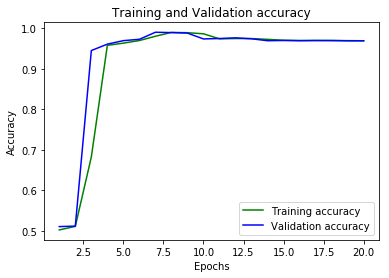

In [22]:
CharRNN(0)